Importing The Data:

In [1]:
import pandas as pd 
olympics_2008=pd.read_csv("olympics_08_medalists.csv")
print("This is the original untidied/unclensed 2008 olympic medalist data:")
print(olympics_2008)

This is the original untidied/unclensed 2008 olympic medalist data:
          medalist_name male_archery female_archery male_athletics  \
0       Aaron Armstrong          NaN            NaN           gold   
1         Aaron Peirsol          NaN            NaN            NaN   
2      Abdullo Tangriev          NaN            NaN            NaN   
3     Abeer Abdelrahman          NaN            NaN            NaN   
4               Abhinav          NaN            NaN            NaN   
...                 ...          ...            ...            ...   
1870        Éver Banega          NaN            NaN            NaN   
1871  Ólafur Stefánsson          NaN            NaN            NaN   
1872      Óscar Brayson          NaN            NaN            NaN   
1873   Łukasz Pawłowski          NaN            NaN            NaN   
1874        Živko Gocić          NaN            NaN            NaN   

     female_athletics male_badminton female_badminton male_baseball  \
0                 Na

The code above shows the original untidied data being imported into the Notebook, as you can see the original data is not easy to understand and would be very hard to analyze. The original data is in wide format, so we should reshape it to be long format. Doing this will make the data much easier to read and understand as well as analyze.

Melting The Data Into Long Format:

In [2]:
olympics_2008_long=pd.melt(olympics_2008, 
                               id_vars="medalist_name",
                               var_name="SportwithGender", 
                               value_name="Medal")
olympics_2008_long=olympics_2008_long.dropna()
olympics_2008_long[["Gender", "Sport"]]=olympics_2008_long["SportwithGender"].str.split("_", expand=True)
olympics_2008_long=olympics_2008_long.drop(columns=["SportwithGender"])
olympics_2008_long=olympics_2008_long.rename(columns={"medalist_name": "Athlete"})
print("This is the melted 2008 olympic medalist data:")
print(olympics_2008_long)

This is the melted 2008 olympic medalist data:
                    Athlete   Medal Gender                  Sport
177            Bair Badënov  bronze   male                archery
676           Ilario Di Buò  silver   male                archery
682            Im Dong-hyun    gold   male                archery
760               Jiang Lin  bronze   male                archery
920          Lee Chang-hwan    gold   male                archery
...                     ...     ...    ...                    ...
130932        Steeve Guénot    gold   male  greco-roman wrestling
131159  Yannick Szczepaniak  bronze   male  greco-roman wrestling
131162       Yavor Yanakiev  bronze   male  greco-roman wrestling
131200      Yury Patrikeyev  bronze   male  greco-roman wrestling
131234         Zoltán Fodor  silver   male  greco-roman wrestling

[1875 rows x 4 columns]


The code above melts the data into wide format. The melted data is clearly much easier to understand. Melting data into long format ensures that each row represents a single observation with all related variables in separate columns. Spliting the column that contains the sport and the gender also makes this data easiler to understand and analyze. As well as dropping all the columns that contain null values and using a consistent naming schema. 

Pivot Table and Aggeration Function:

In [3]:
olympics_2008_pivot=olympics_2008_long.pivot_table(index="Sport",
                                                     columns="Gender",
                                                     values="Medal",
                                                     aggfunc="count")
print("This is the 2008 olympic medalist data in a pivot table showing the count of medals per sport:")
print(olympics_2008_pivot)

This is the 2008 olympic medalist data in a pivot table showing the count of medals per sport:
Gender                 female  male
Sport                              
archery                   9.0  11.0
artistic gymnastics      20.0  29.0
association football     54.0  55.0
athletics                81.0  85.0
badminton                10.0  12.0
baseball                  NaN  72.0
basketball               36.0  35.0
beach volleyball          6.0   6.0
bmx                       3.0   3.0
boxing                    NaN  44.0
canoeing and kayaking    21.0  53.0
diving                   13.0  16.0
equestrian sport         20.0  18.0
fencing                  26.0  28.0
field hockey             48.0  50.0
freestyle wrestling      16.0  28.0
greco-roman wrestling     NaN  27.0
handball                 42.0  43.0
judo                     28.0  28.0
modern pentathlon         2.0   3.0
mountain biking           3.0   3.0
rhythmic gymnastics      21.0   NaN
road bicycle racing       6.0   5.0
rowin

The code above uses a pivot table to aggerate the count of medals by sport and gender. Using a pivot table to aggerate this data keeps the structure tidy. 

Visualizations:

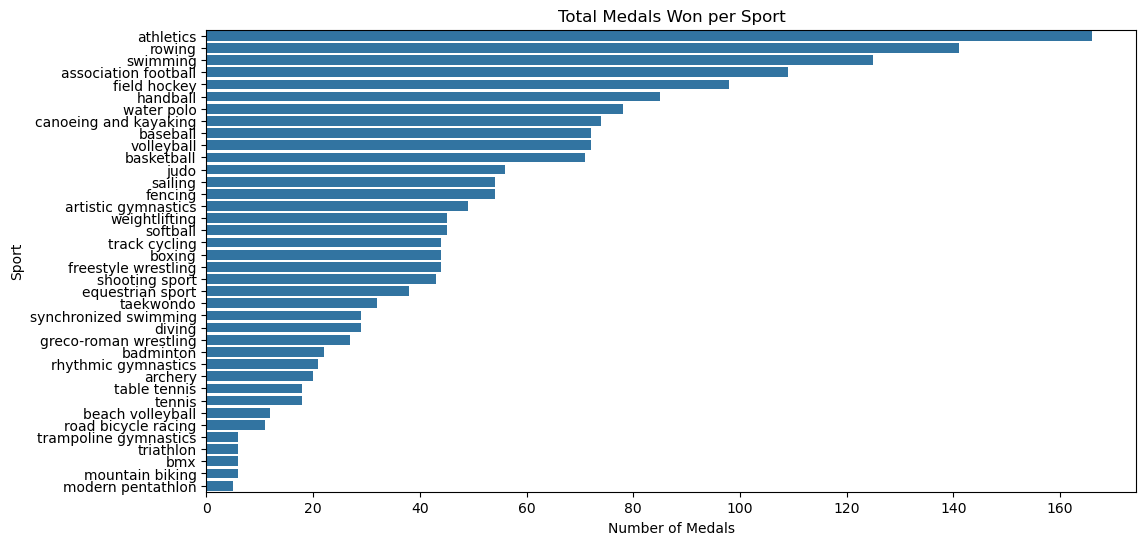

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.countplot(data=olympics_2008_long, 
              y="Sport", 
              order=olympics_2008_long["Sport"].value_counts().index)
plt.xlabel("Number of Medals")
plt.ylabel("Sport")
plt.title("Total Medals Won per Sport")
plt.show()

This visualization shows the total number of medals (bronze, silver, or gold) that were won by each sport (not separated by gender) at the 2008 Olympics. "Athletics" is a broad term, but the specific sport that won the most medals is rowing. 

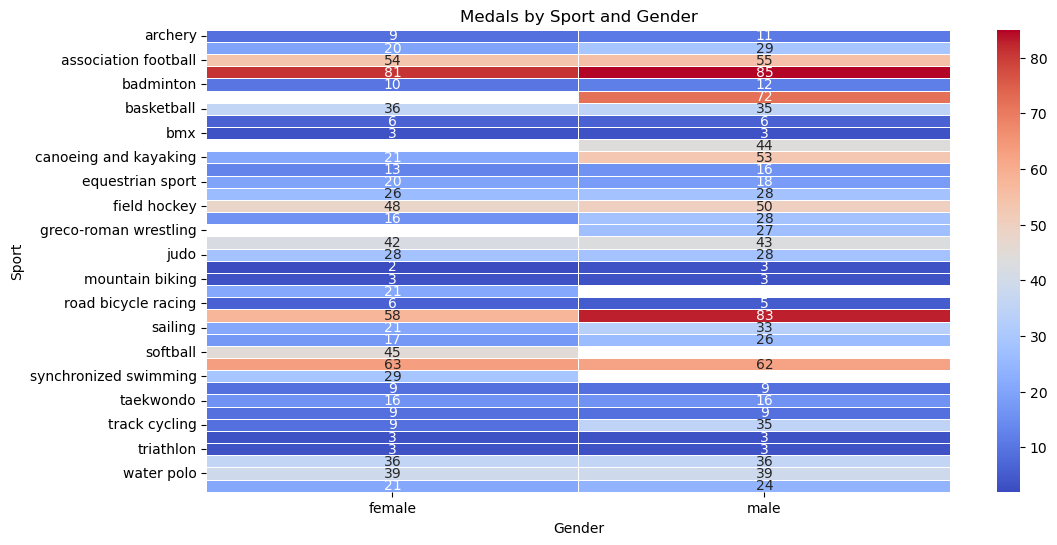

In [5]:
plt.figure(figsize=(12,6))
sns.heatmap(olympics_2008_pivot, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Medals by Sport and Gender")
plt.show()

This visualization shows a heatmap of medals by both gender and sport. It is a good visual becuase it shows if their is a gender disparity in a sport. It also shows if the sport is not offered for one gender, for exanple synchronized swimming is only female. 

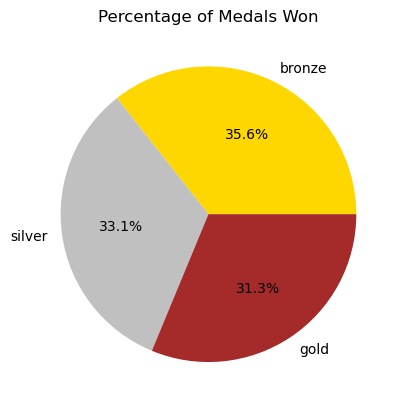

In [6]:
olympics_2008_long["Medal"].value_counts().plot.pie(autopct="%1.1f%%", colors=["gold", "silver", "brown"])
plt.title("Percentage of Medals Won")
plt.ylabel("")
plt.show()

This visal is good because it shows the distribution of medals. It is expected that an equal number of each medal is given, but this shows more bronze medals are given out than any other medal. 